In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [34]:
dataset=MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [31]:
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())
len(test_dataset)

10000

In [32]:
dataset[0]      #data for row 1
dataset[0][0]     #image for above data
dataset[0][1]       #label

5

Label: 5


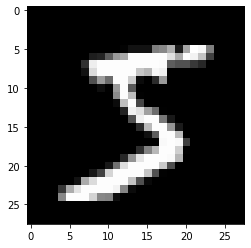

In [35]:
import matplotlib.pyplot as plt
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

### load MINST into tensor

In [7]:
import torchvision.transforms as transforms
#transform 

In [8]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
image_tensor=dataset[0][0]          #load the first data from training dataset
label=dataset[0][1]
print(image_tensor.shape,label)
image_tensor[0,10:15,10:15]


torch.Size([1, 28, 28]) 5


tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey. We can also plot the tensor as an image using plt.imshow

# split dataset into traning, validation, testing

In [9]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [10]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Train the model

### model

In [11]:
import torch.nn as nn

input_size=28*28
num_classes=10

model=nn.Linear(input_size,num_classes)
#model.parameters
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [12]:
for images,labels in train_loader:
  print(images.shape)
  break

torch.Size([128, 1, 28, 28])


data shape and training weight size does not match, need to reshape the data

In [13]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        print("1")
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(128, 784)
        print("2")
        out = self.linear(xb)
        return out
model = MnistModel()
model(images)


1
2


tensor([[ 0.2884,  0.1469,  0.0842,  ...,  0.0937,  0.1114,  0.0135],
        [-0.0561, -0.0363, -0.1627,  ...,  0.1726,  0.1574, -0.2425],
        [ 0.1289, -0.1666,  0.0551,  ...,  0.1277, -0.2812, -0.3743],
        ...,
        [-0.1216,  0.1351, -0.2288,  ...,  0.1817, -0.0359, -0.2705],
        [-0.4313, -0.0286, -0.0126,  ...,  0.1020, -0.0432, -0.0822],
        [-0.1265,  0.0991, -0.1193,  ..., -0.0591, -0.0334, -0.1558]],
       grad_fn=<AddmmBackward0>)

In [14]:
for images, labels in train_loader:
  
    print(images.shape)                           #only use the first batch
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
2
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0197, -0.1790,  0.0595,  0.0324, -0.3895, -0.1457, -0.3407,  0.0346,
          0.0972, -0.2679],
        [ 0.0608, -0.2369,  0.0646,  0.0188, -0.2829,  0.0407, -0.4458,  0.3015,
         -0.0049, -0.1980]])


## loss function

In [15]:
import torch.nn.functional as F
probs = F.softmax(outputs, dim=1)         #gives the probability for all the data in dataset
probs[1]

tensor([0.1114, 0.0827, 0.1118, 0.1068, 0.0790, 0.1092, 0.0671, 0.1417, 0.1043,
        0.0860], grad_fn=<SelectBackward0>)

In [16]:
max,preds=torch.max(probs,dim=1)
#print(max)
print("prediction labels",preds)              #prediction
print("true labels",labels)               

prediction labels tensor([8, 7, 1, 7, 7, 4, 8, 3, 3, 1, 3, 1, 8, 0, 4, 8, 5, 8, 8, 5, 8, 8, 0, 8,
        7, 1, 8, 1, 3, 8, 1, 1, 0, 5, 8, 5, 0, 5, 8, 8, 9, 8, 0, 7, 8, 5, 0, 8,
        1, 1, 3, 5, 5, 8, 0, 1, 7, 1, 8, 8, 8, 8, 3, 1, 9, 5, 3, 8, 4, 7, 8, 1,
        8, 5, 8, 0, 0, 5, 3, 1, 2, 8, 1, 8, 7, 3, 9, 9, 1, 8, 5, 5, 3, 8, 7, 8,
        0, 5, 1, 0, 3, 7, 8, 5, 8, 8, 1, 1, 0, 8, 7, 5, 0, 5, 8, 3, 0, 0, 5, 1,
        8, 7, 7, 0, 8, 1, 1, 7])
true labels tensor([0, 6, 2, 0, 5, 2, 2, 5, 8, 8, 6, 7, 1, 4, 0, 7, 8, 3, 0, 4, 1, 8, 7, 1,
        0, 3, 0, 4, 6, 5, 9, 0, 6, 3, 6, 2, 0, 4, 4, 2, 3, 4, 7, 0, 2, 9, 9, 1,
        7, 5, 3, 7, 1, 6, 1, 9, 6, 0, 8, 3, 8, 2, 3, 0, 1, 5, 5, 0, 3, 6, 8, 6,
        8, 6, 1, 8, 6, 9, 3, 5, 6, 8, 9, 3, 5, 2, 1, 1, 0, 3, 6, 6, 6, 9, 3, 5,
        4, 1, 1, 4, 3, 8, 2, 6, 7, 3, 8, 4, 9, 2, 6, 9, 7, 0, 1, 3, 9, 7, 1, 8,
        8, 0, 5, 9, 6, 6, 7, 0])


In [17]:
torch.sum(preds == labels)

tensor(15)

In [18]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(outputs, labels)

tensor(0.1172)

lost function

In [19]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels) #(input, target)
print(loss)
#print(outputs.shape)
#labels

tensor(2.3040, grad_fn=<NllLossBackward0>)


## fit the model

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self,batch):
        images, labels=batch
        out=self(images)
        loss=F.cross_entropy(out, labels)
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out=self(images)
        loss=F.cross_entropy(out, labels)
        acc=accuracy(out, labels)
        return loss, acc

In [21]:
def fit(epochs, step_size, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), step_size) #lr: stepsize
    loss_epoch_res=[]
    acc_epoch_res=[]
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        loss_result=[]
        accuracy_result=[]
        for batch in val_loader:
            loss, acc=model.validation_step(batch)
            loss_result.append(loss)
            accuracy_result.append(acc)

        avg_loss=sum(loss_result)/len(loss_result)
        avg_acc=sum(accuracy_result)/len(accuracy_result)
        loss_epoch_res.append(avg_loss)
        acc_epoch_res.append(avg_acc)
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, avg_loss, avg_acc))
    return loss_epoch_res,acc_epoch_res

## train the model

In [22]:
acc_final_res=[]
model = MnistModel()
result1=fit(5, 0.001, model, train_loader, val_loader)
loss,acc=result1
for item in acc:
  acc_final_res.append(item)

Epoch [0], val_loss: 1.9498, val_acc: 0.6562
Epoch [1], val_loss: 1.6790, val_acc: 0.7353
Epoch [2], val_loss: 1.4775, val_acc: 0.7651
Epoch [3], val_loss: 1.3252, val_acc: 0.7853
Epoch [4], val_loss: 1.2081, val_acc: 0.8032


In [23]:
result2=fit(5, 0.001, model, train_loader, val_loader)
loss,acc=result2
loss,acc=result2
for item in acc:
  acc_final_res.append(item)

Epoch [0], val_loss: 1.1161, val_acc: 0.8140
Epoch [1], val_loss: 1.0422, val_acc: 0.8224
Epoch [2], val_loss: 0.9817, val_acc: 0.8287
Epoch [3], val_loss: 0.9315, val_acc: 0.8348
Epoch [4], val_loss: 0.8891, val_acc: 0.8393


In [24]:
result3=fit(5, 0.001, model, train_loader, val_loader)
loss,acc=result3
for item in acc:
  acc_final_res.append(item)

Epoch [0], val_loss: 0.8527, val_acc: 0.8445
Epoch [1], val_loss: 0.8212, val_acc: 0.8467
Epoch [2], val_loss: 0.7936, val_acc: 0.8494
Epoch [3], val_loss: 0.7693, val_acc: 0.8515
Epoch [4], val_loss: 0.7477, val_acc: 0.8527


In [25]:
result4=fit(5, 0.001, model, train_loader, val_loader)
loss,acc=result4
for item in acc:
  acc_final_res.append(item)

Epoch [0], val_loss: 0.7283, val_acc: 0.8547
Epoch [1], val_loss: 0.7109, val_acc: 0.8561
Epoch [2], val_loss: 0.6951, val_acc: 0.8582
Epoch [3], val_loss: 0.6806, val_acc: 0.8594
Epoch [4], val_loss: 0.6674, val_acc: 0.8603


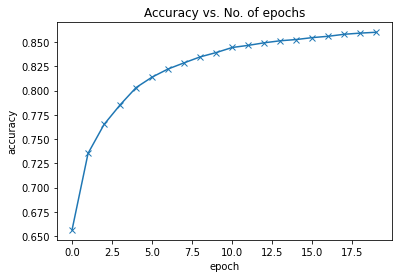

In [26]:
plt.plot(acc_final_res, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Prediction

In [27]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

img.unsqueeze simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.



Label: 7 , Predicted: 7


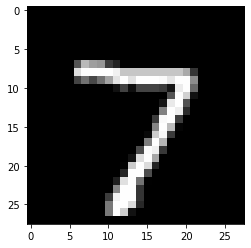

In [37]:
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())
img, label = test_ds[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [38]:
test_loader = DataLoader(test_ds, batch_size*2)
